In [1]:
%matplotlib inline
from IPython import display
import os, sys

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib 
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
matplotlib.rc('font', size=17)

In [5]:
# for loading absorption coefficient calculated using line-by-line
# k(v, pt)

def get_data_file_paths():
    
    dir_common = os.path.join('/lfs1/home/jackyu/radiation',
                              'crd/LW/examples',
                              'separate_g_groups',
                              'study__lblnew_g1_threshold',
                              'n2o',
                              'wn_20_3000',
                              'absgas_variousPTs')
    
    path_runs = [os.path.join(dir_common, 'output_absgas.dat')]
    return path_runs



def load_absgas_file(path_absgas):
    df = pd.read_csv(path_absgas, sep=r'\s+')
    df = df.set_index(['v', 'pressure', 'temperature'])
    
    ds = xr.Dataset.from_dataframe(df)
    ds = ds.stack(pt=('pressure', 'temperature'))
    ds.coords['ipt'] = ('pt', range(1, ds.dims['pt'] + 1))
    return ds   
    

    
def load_absgas_files(paths_absgas):
    dss = [load_absgas_file(fpath) for fpath in paths_absgas]
    return xr.concat(dss, dim='pt')



def n2o_band7_limits():
    return {'min': 1215, 'max': 1380}



def ref_pts():
    return {'low': (50, 250), 'high': (1, 250)}




def get_tworef_dataframe(ds, min_wvn=0, max_wvn=3000, pts=None):
    if pts == None:
        pts = [(50, 250)]
        
    pts = sorted([pt for _, pt in ref_pts().items()],
                 key=lambda x: x[0])
    return ds['absgas'].sel(pt=pts, v=slice(min_wvn, max_wvn))\
           .to_pandas()


In [6]:
ds = load_absgas_files(get_data_file_paths())

In [8]:
vmin = n2o_band7_limits()['min']
vmax = n2o_band7_limits()['max']

pts = [(1, 250), (50, 250), (500, 250)]

df = ds['absgas'].sel(v=slice(vmin, vmax)).sel(pt=pts).to_pandas()

df_norm = df / (df.max() - df.min())
df_norm = df_norm.sort_index(axis=1)

In [9]:
df_norm.head()

pressure,1.0,50.0,500.0
temperature,250.0,250.0,250.0
v,,,
1215.001,1.919557e-06,0.000003,0.000043
1215.003,7.251806e-07,0.000003,0.000043
1215.005,1.779270e-08,0.000002,0.000044
1215.007,6.695258e-09,0.000001,0.000044
1215.009,4.450323e-09,0.000001,0.000045


# Scatter matrix between $k(\nu, P, T)$ at different $P$

$T = 250 K$

$980 cm^{-1} \le \nu \le 1100 cm^{-1}$ 

### k 8x8 scatter matrix

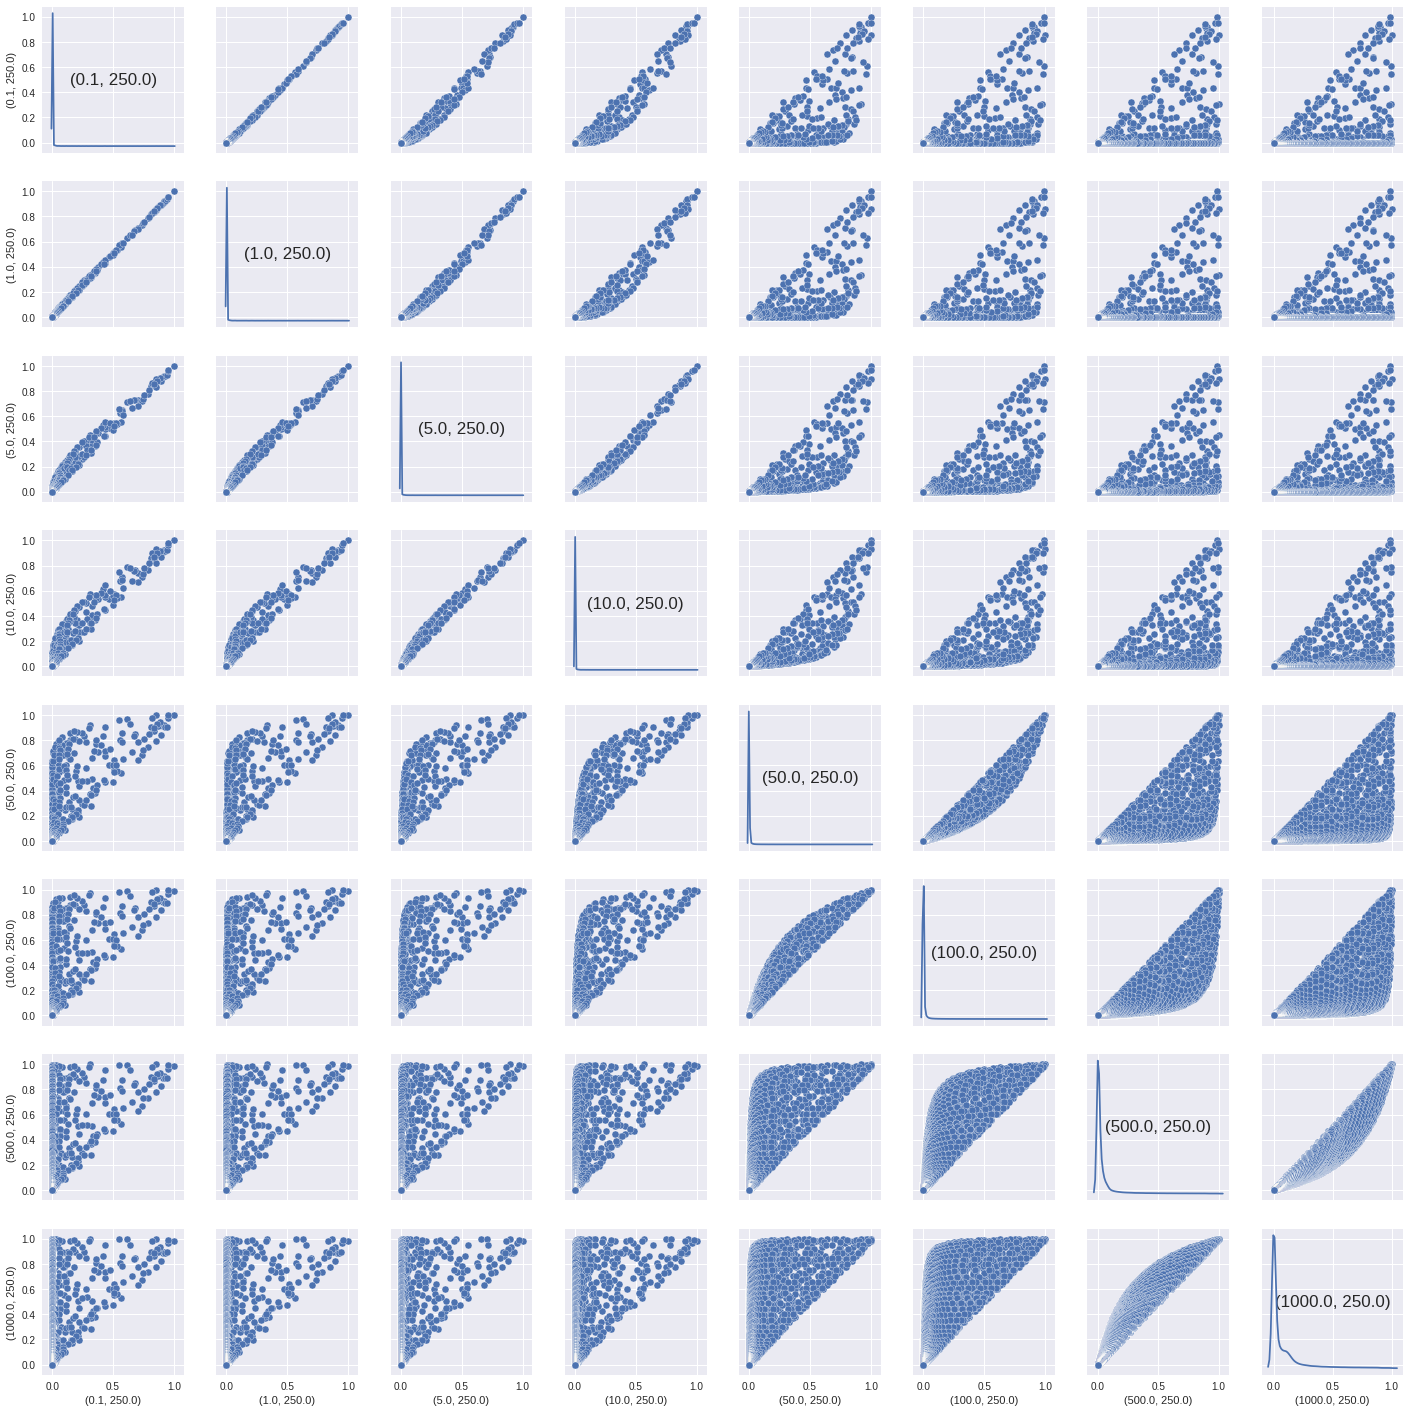

In [28]:
vmin = n2o_band7_limits()['min']
vmax = n2o_band7_limits()['max']

df = ds['absgas'].sel(v=slice(vmin, vmax)).to_pandas()

df_norm = (df - df.min()) / (df.max() - df.min())
df_norm = df_norm.sort_index(axis=1)

pairgrid = sns.pairplot(df_norm,
                        diag_kind='kde')

for pt, ax in zip(df_norm.columns.values, np.diag(pairgrid.axes)):
    ax.text(.5, .5, 
            '({}, {})'.format(*pt),
            transform=ax.transAxes,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=17)
      

### log(k) 8x8 scatter matrix

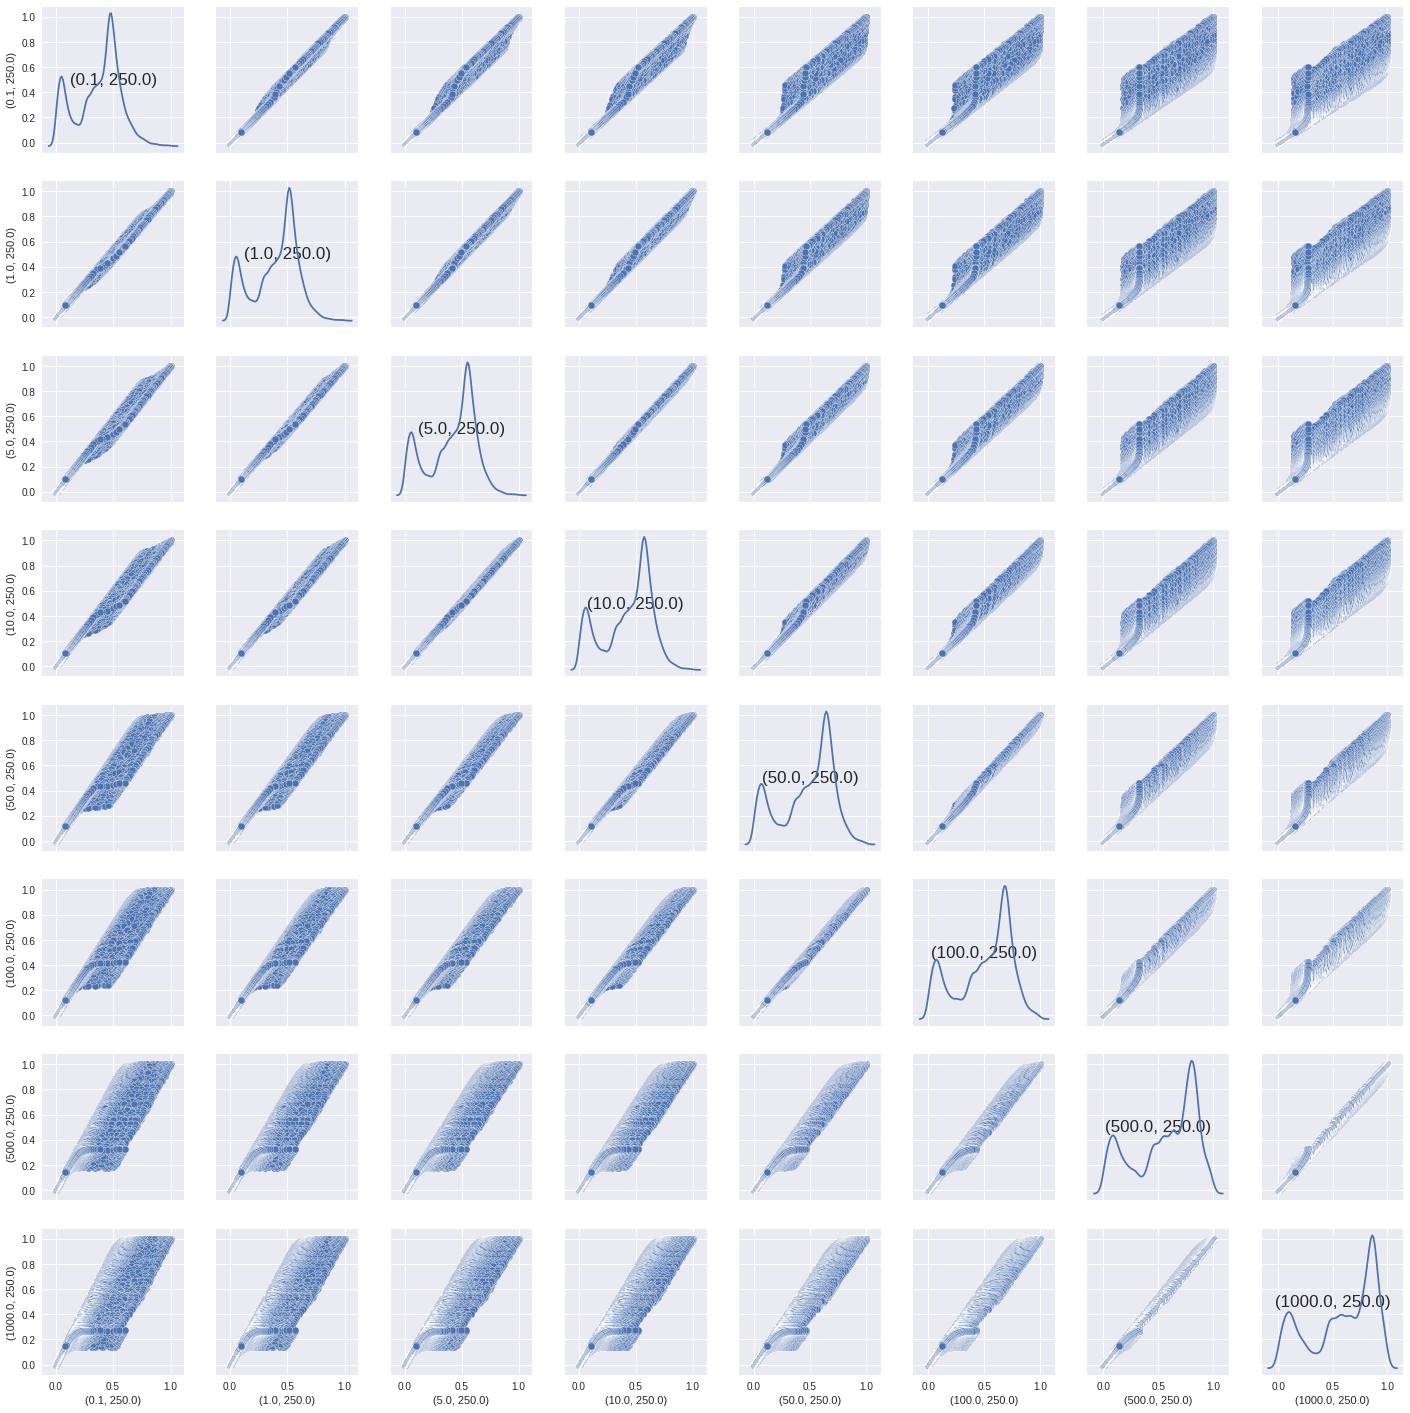

In [27]:
vmin = n2o_band7_limits()['min']
vmax = n2o_band7_limits()['max']

df = np.log10(ds['absgas'].sel(v=slice(vmin, vmax)).to_pandas())

df_norm = (df - df.min()) / (df.max() - df.min())
df_norm = df_norm.sort_index(axis=1)

pairgrid = sns.pairplot(df_norm, 
                       diag_kind='kde')

for pt, ax in zip(df_norm.columns.values, np.diag(pairgrid.axes)):
    ax.text(.5, .5, 
            '({}, {})'.format(*pt),
            transform=ax.transAxes,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=17)
      

### Log(k) 3x3 scatter matrix

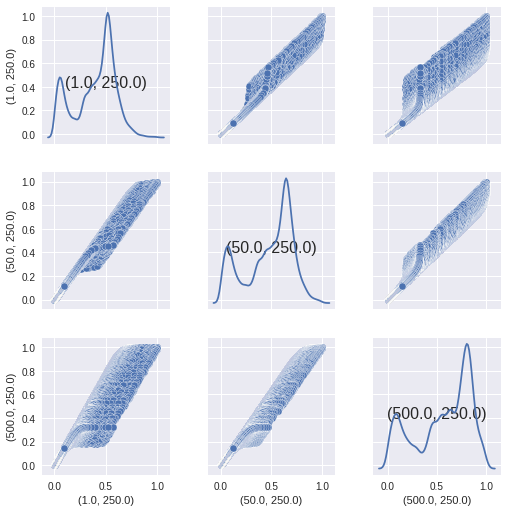

In [24]:

vmin = n2o_band7_limits()['min']
vmax = n2o_band7_limits()['max']

pts = [(1, 250), (50, 250), (500, 250)]

df = np.log10(ds['absgas'].sel(v=slice(vmin, vmax)).sel(pt=pts).to_pandas())

df_norm = (df - df.min()) / (df.max() - df.min())
df_norm = df_norm.sort_index(axis=1)

pairgrid = sns.pairplot(df_norm, 
                        diag_kind='kde')

for pt, ax in zip(df_norm.columns.values, np.diag(pairgrid.axes)):
    ax.text(.5, .5, 
            '({}, {})'.format(*pt),
            transform=ax.transAxes,
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16)
      

In [23]:
sns.pairplot?

In [30]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

